### Ultimate Data Challenge

**SPRINGBOARD QUESTION:** The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

#### 2. Importing Datasets

In [2]:
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


 ### 3. Login Dataset Exploratory Data Analysis

In [3]:
# Resetting the index
logins.set_index('login_time', inplace=True)
# counting the number of logins each time 
logins['num_logins']=np.ones(len(logins))
logins.head()

,num_logins
login_time,
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0


In [4]:
type(logins.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
# the dataset given is from January 1970 to April the 13th 1970 
print(logins.head(1),logins.tail(1))

                     num_logins
login_time                     
1970-01-01 20:13:18         1.0                      num_logins
login_time                     
1970-04-13 18:54:23         1.0


In [6]:
# We can resample the dataset every 15 min to see the total number of logins every 15 min
logins_15=logins.resample('15T').sum()
logins_15.head()

,num_logins
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


#### 3.1 Average of number of logins each month

In [7]:
logins_monthly=logins_15.resample('1M').mean()
logins_monthly['month']=['January', 'February','March', 'April']
logins_monthly

,num_logins,month
login_time,,
1970-01-31,7.333909,January
1970-02-28,9.178943,February
1970-03-31,11.331653,March
1970-04-30,10.999186,April


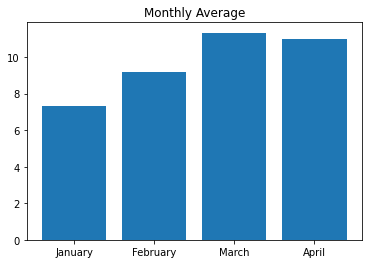

In [8]:
plt.title('Monthly Average')
plt.bar(x=logins_monthly.month, height=logins_monthly.num_logins);

We can see an increase of number of logins from January to March and small decrease from March to April

#### 3.2 Daily Analysis of logins

In [9]:
# we first resample the sample to see the average of logins each day
logins_day=logins_15.resample('1D').mean()
logins_day.head()

,num_logins
login_time,
1970-01-01,7.000000
1970-01-02,7.093750
1970-01-03,8.260417
1970-01-04,8.208333
1970-01-05,4.781250


In [10]:
logins_day['days']=logins_day.index.day_name()
logins_day.reset_index(drop=True)
logins_day.head()

,num_logins,days
login_time,,
1970-01-01,7.000000,Thursday
1970-01-02,7.093750,Friday
1970-01-03,8.260417,Saturday
1970-01-04,8.208333,Sunday
1970-01-05,4.781250,Monday


In [11]:
logins_weekdays=logins_day.groupby(['days']).mean()
logins_weekdays

,num_logins
days,
Friday,10.561111
Monday,6.199269
Saturday,13.456250
Sunday,12.615972
Thursday,8.694444
Tuesday,6.895833
Wednesday,7.692708


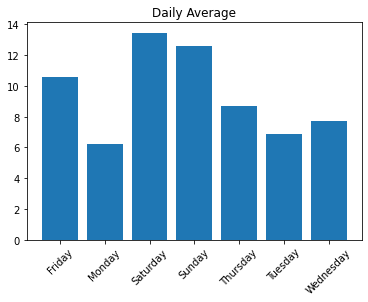

In [12]:
plt.title('Daily Average')
plt.bar(x=logins_weekdays.index, height=logins_weekdays.num_logins)
plt.xticks(rotation=45);

Friday, Saturday and Sunday are the days where there are more numbers of logins: this is probably because that people use their own vehicles during week days and use taxis more during weekends

In [14]:
logins_15['days']=logins_15.index.day_name()
logins_15['time']=logins_15.index.time

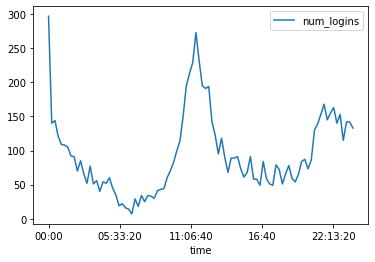

In [43]:
#Monday
monday=logins_15.groupby(['days','time']).sum().iloc[97:193]
monday=monday.droplevel('days')
monday.plot();

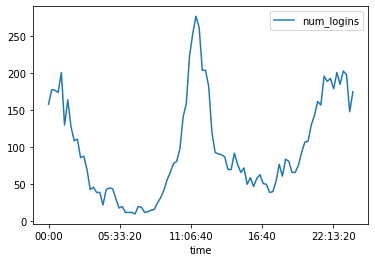

In [44]:
#tuesday
tuesday=logins_15.groupby(['days','time']).sum().iloc[485:581]
tuesday=tuesday.droplevel('days')
tuesday.plot();

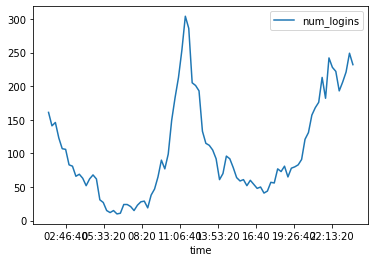

In [45]:
#Wednesday
wednesday=logins_15.groupby(['days','time']).sum().iloc[582:678]
wednesday=wednesday.droplevel('days')
wednesday.plot();

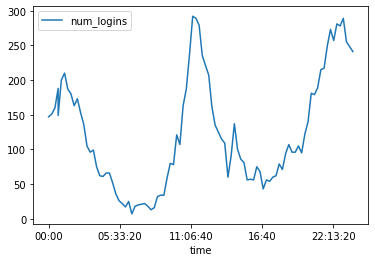

In [46]:
#thursday
thursday=logins_15.groupby(['days','time']).sum().iloc[387:484]
thursday=thursday.droplevel('days')
thursday.plot();

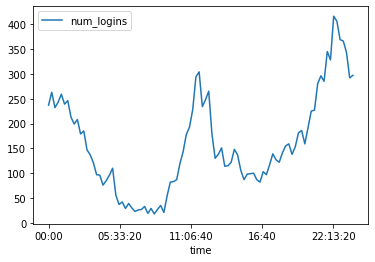

In [47]:
#Friday
friday=logins_15.groupby(['days','time']).sum().iloc[0:96]
friday=friday.droplevel('days')
friday.plot();

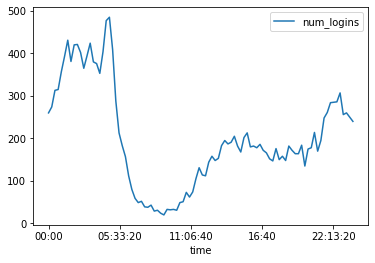

In [48]:
#Saturday
saturday=logins_15.groupby(['days','time']).sum().iloc[194:290]
saturday=saturday.droplevel('days')
saturday.plot();

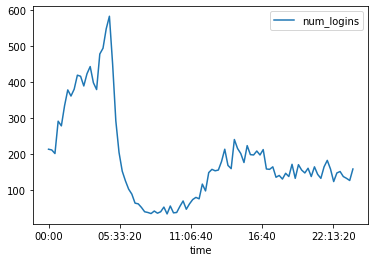

In [49]:
#Sunday
sunday=logins_15.groupby(['days','time']).sum().iloc[291:387]
sunday=sunday.droplevel('days')
sunday.plot();

**Weekdays** :many people login during the day (midday). There is also an increase of logins during late hours up around midnight where as during **weekends** we see a high number of logins from midnight up to early hours of the day but lower number of logins during the day